In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%precision 3

# Import other libraries
import os
import sys

# Import our own libraries
sys.path.append(os.path.join(os.getcwd(), ".."))
from lib import eyegaze as eg

In [2]:
def plot(target_dir):
    gaze_data = pd.read_csv(target_dir+'tobii_gaze.csv')
    test_data = pd.read_csv(target_dir+'Pre Test1.csv')
    time = test_data[['text_time', 'question_time', 'confidence_time', 'explanation_time']]
    diff = time.iat[0, 0] - gaze_data.iat[0, 0]
    time_data = time - diff
    len = time_data.shape[1]-1

    for i in range(0, len):
        gaze_data_text = gaze_data[(gaze_data['#timestamp'] >= time_data.iat[0, i]) & (gaze_data['#timestamp'] < time_data.iat[0, i+1])]
        x = gaze_data_text['#timestamp']
        y = gaze_data_text['gaze_x']

        plt.figure(figsize=(20, 30))
        plt.subplot(2*len,1,i*2+1)
        plt.plot(x, y, linewidth=2, color='blue')
        plt.scatter(time_data.iloc[0:1, i:i+2], [200, 1400], c='red', s=100)
        plt.title('Timestamp and gaze x coordinate', fontsize=20)
        plt.xlabel('Timestamp', fontsize=20)
        plt.ylabel('gaze x coordinate', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.grid(True)

        y = gaze_data_text['gaze_y']
        plt.subplot(2*len,1,i*2+2)
        plt.plot(x, y, linewidth=2, color='blue')
        plt.scatter(time_data.iloc[0:1, i:i+2], [200, 800], c='red', s=100)
        plt.title('Timestamp and gaze y coordinate', fontsize=20)
        plt.xlabel('Timestamp', fontsize=20)
        plt.ylabel('gaze y coordinate', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.grid(True)

        plt.tight_layout()

    return gaze_data[(gaze_data['#timestamp'] >= time_data.iat[0, 0]) & (gaze_data['#timestamp'] < time_data.iat[0, 1])]

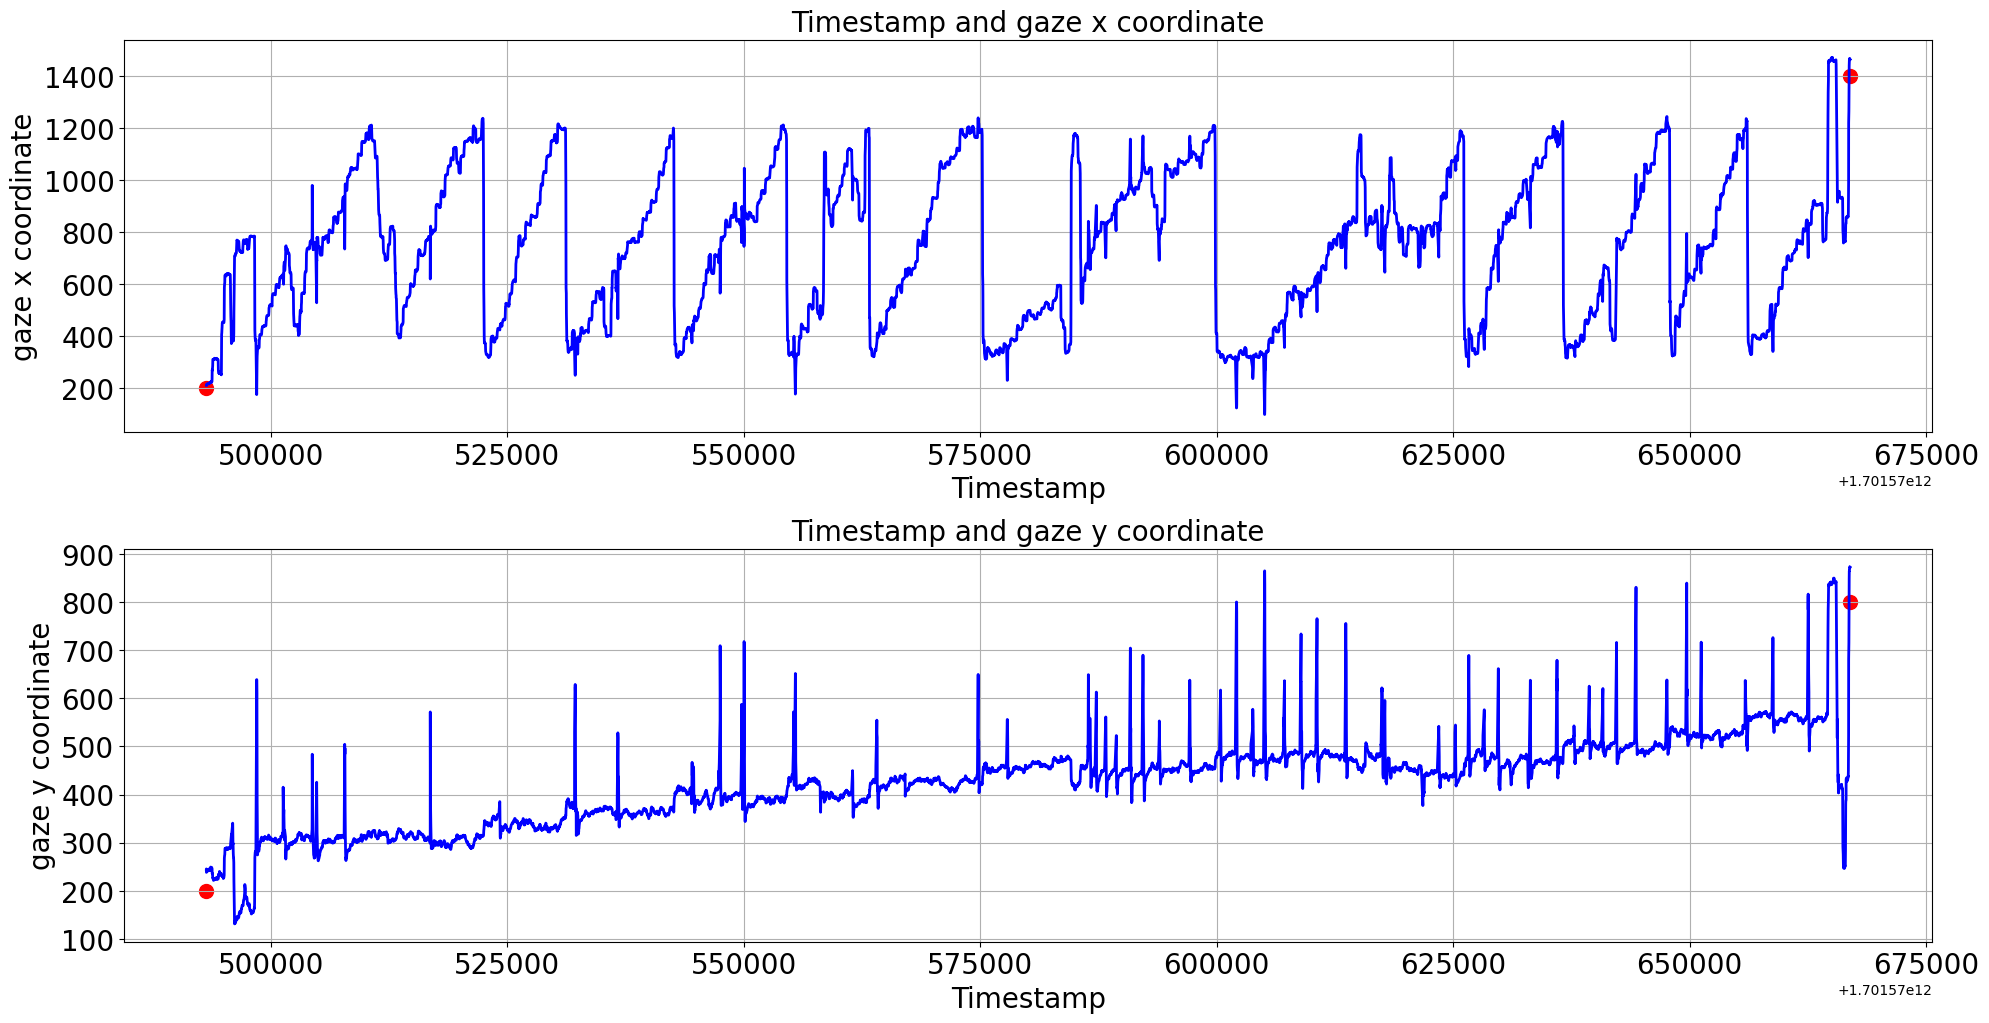

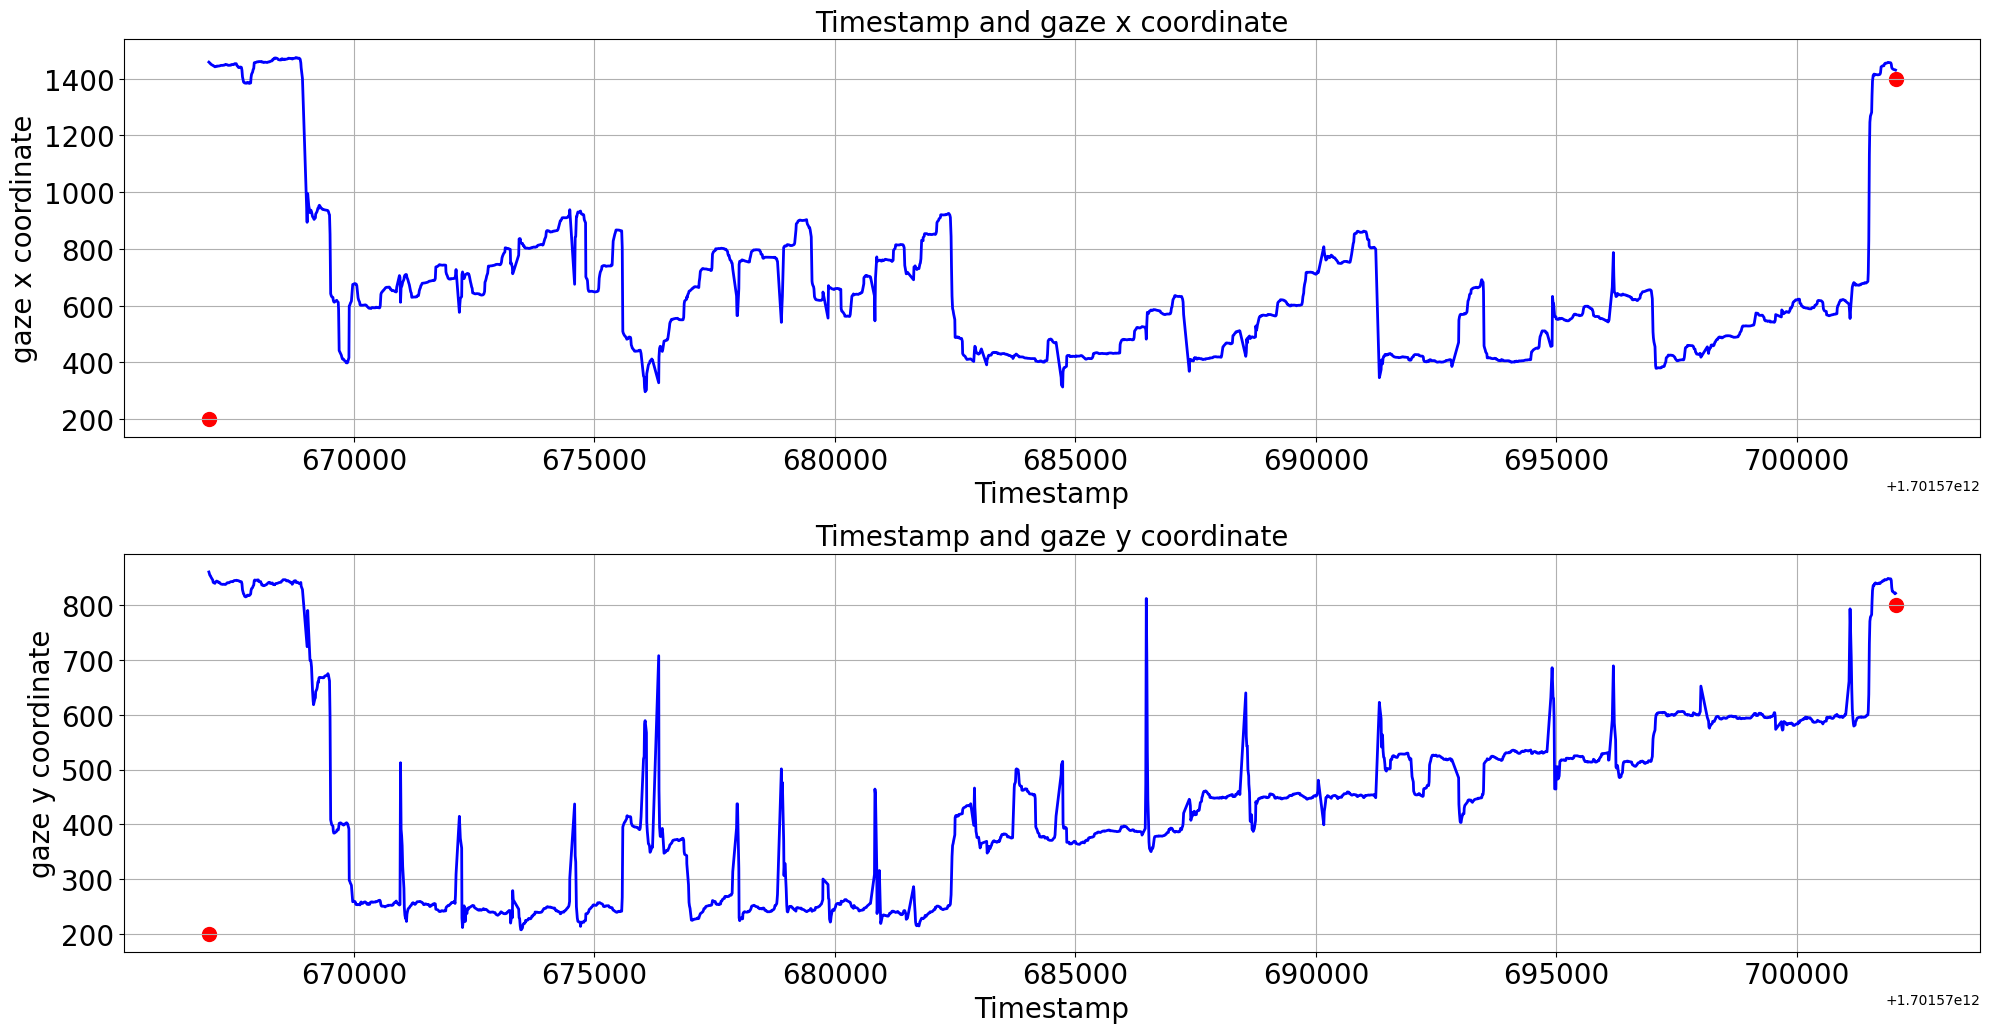

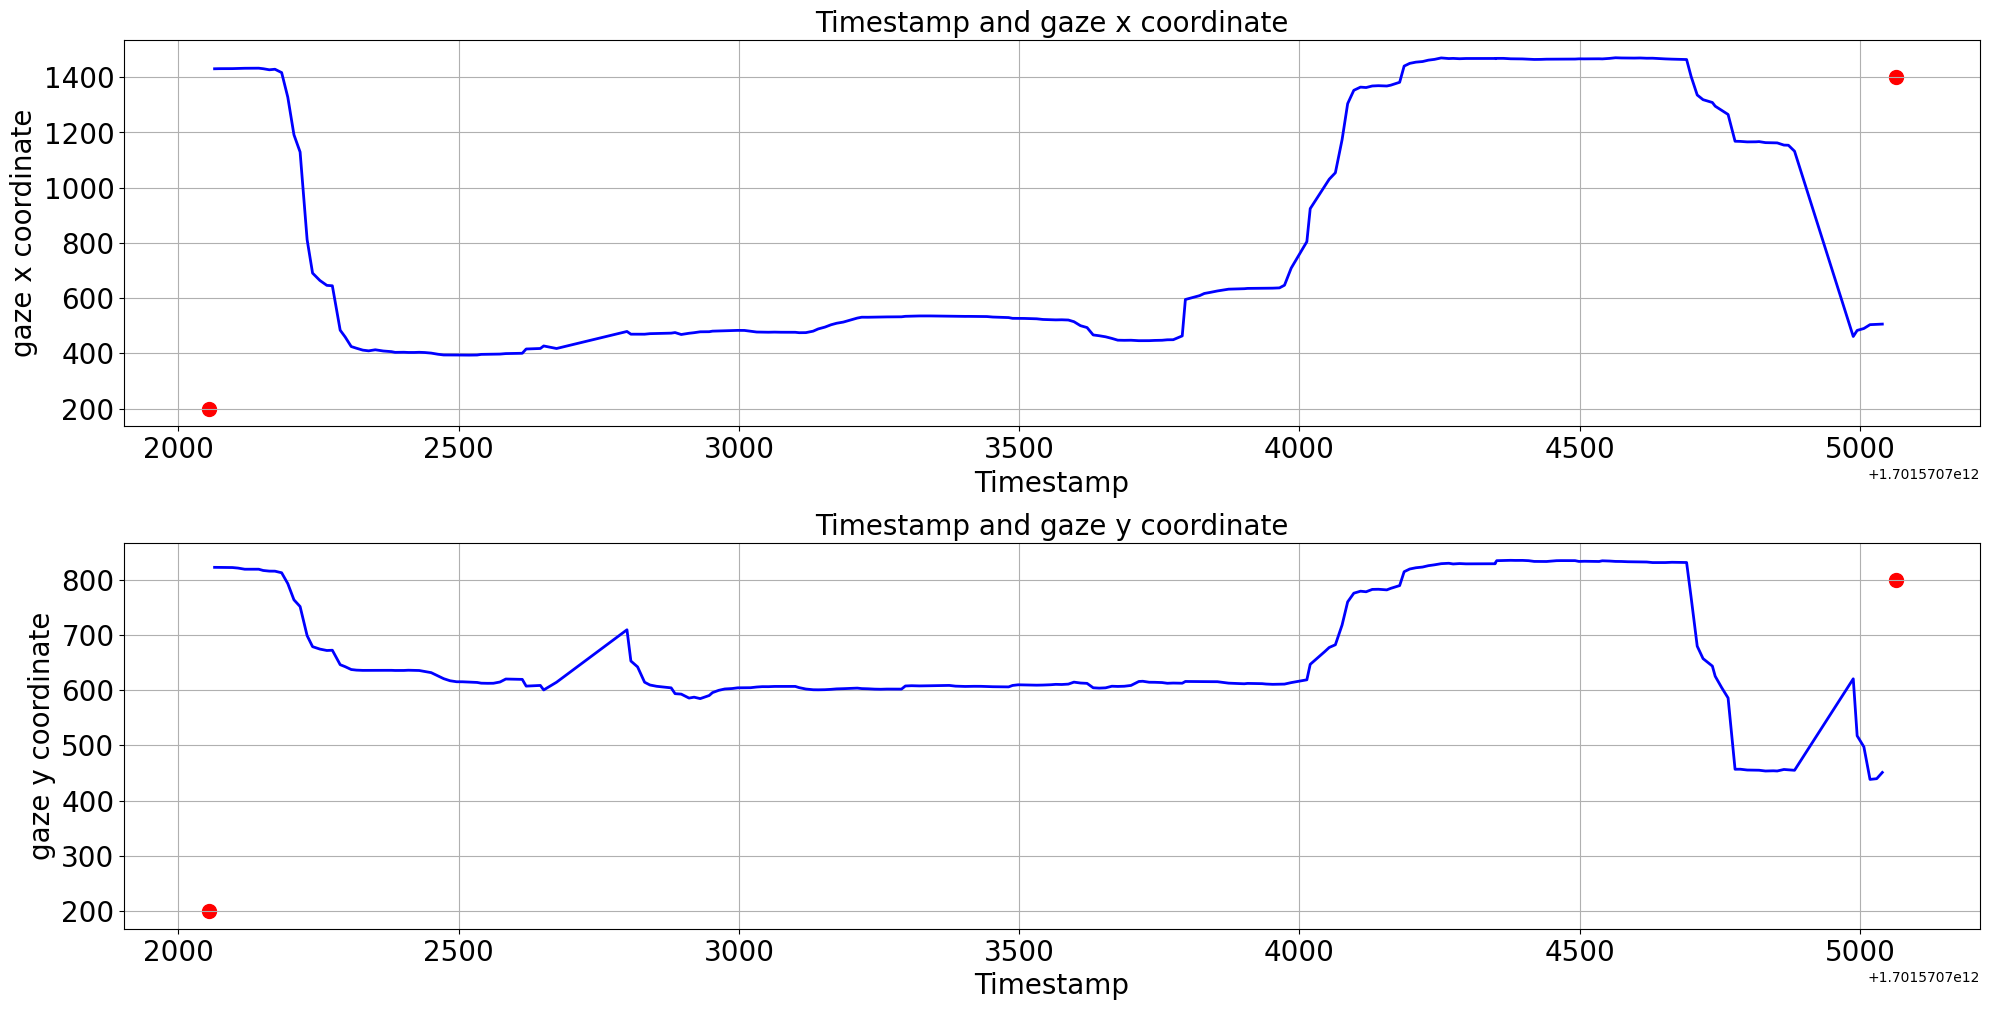

In [3]:
target_dir = "../../data/input/tobii_test/"
text_data = plot(target_dir)

## Load gaze data recorded by Tobii eye tracker

### ----使わない----

In [79]:
def v(data, column):
    return data[column].values

def readTobiiData(target_dir):
    data = pd.read_csv(target_dir+"tobii_gaze.csv")
    gaze_x = v(data, "gaze_x")*1.2
    gaze_y = v(data, "gaze_y")*1.2
    data = np.vstack((v(data,"#timestamp")*0.001, gaze_x, gaze_y)).T

    edata = pd.read_csv(target_dir+"Pre Test1.csv")
    events = v(edata, "text_time")
    diff = events[0] - data[0][0]
    events = events - diff
    
    return [np.array([d for d in data if events[i-1] < d[0] and d[0] < events[i]]) for i in range(1, len(events))]

def readEvents(path):
    data = pd.read_csv(path)
    return v(data, "#timestamp")*0.001

In [5]:
target_dir = "../../data/input/tobii_test2/"
all_data = readTobiiData(target_dir)

### ----使わない----

## Visualize gaze data

In [4]:
gaze_x = text_data['gaze_x']*1.25
gaze_y = text_data['gaze_y']*1.25
data = np.vstack((text_data['#timestamp'], gaze_x, gaze_y)).T

In [5]:
# Fixation-saccade detection proposed by Buscher et al. (2008)
fx = eg.detectFixations(data[:, 0], data[:, 1], data[:, 2],
                        min_concat_gaze_count=9, min_fixation_size=20, max_fixation_size=40)

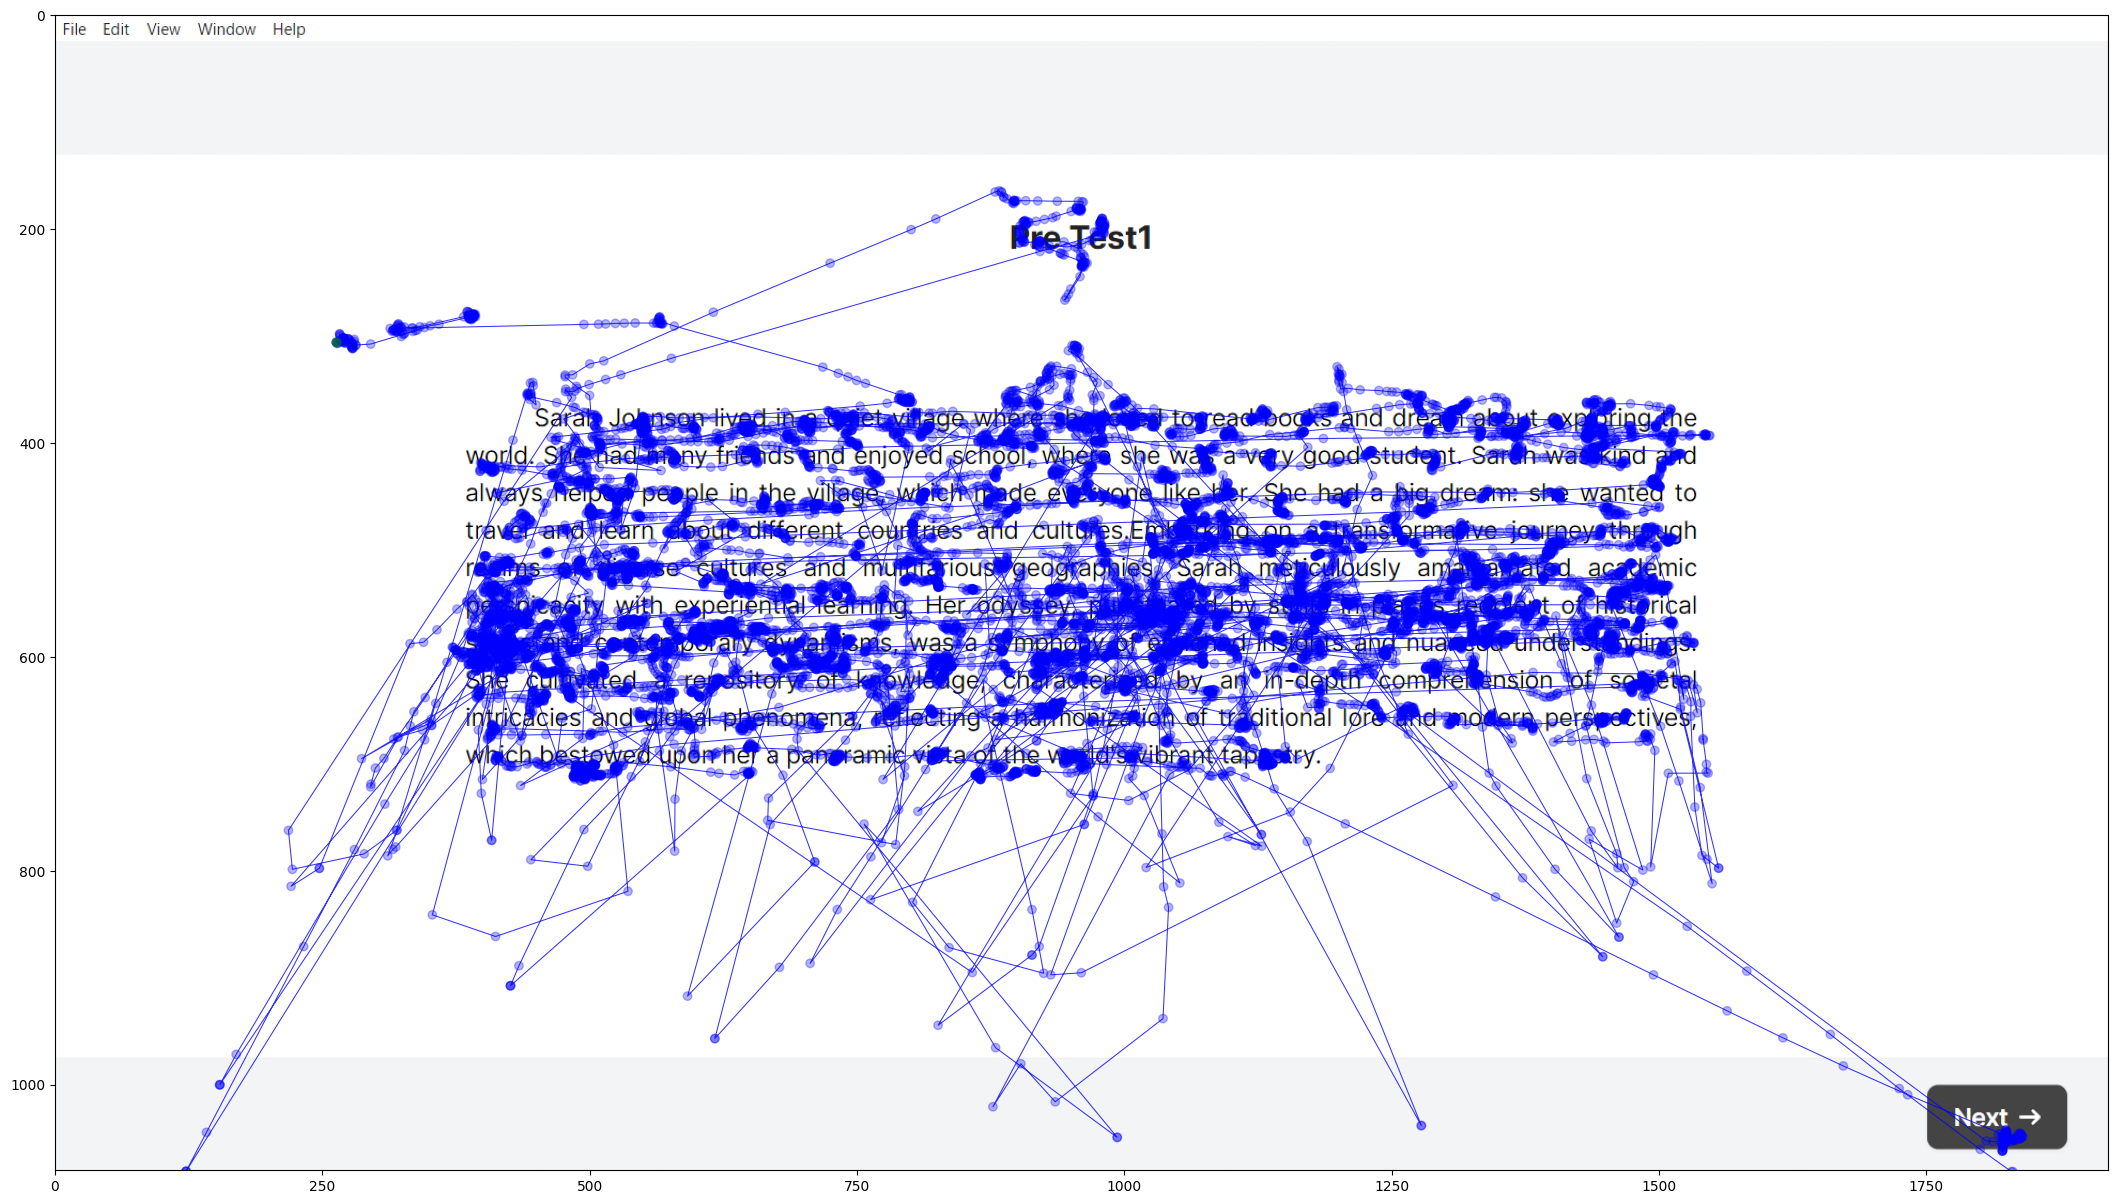

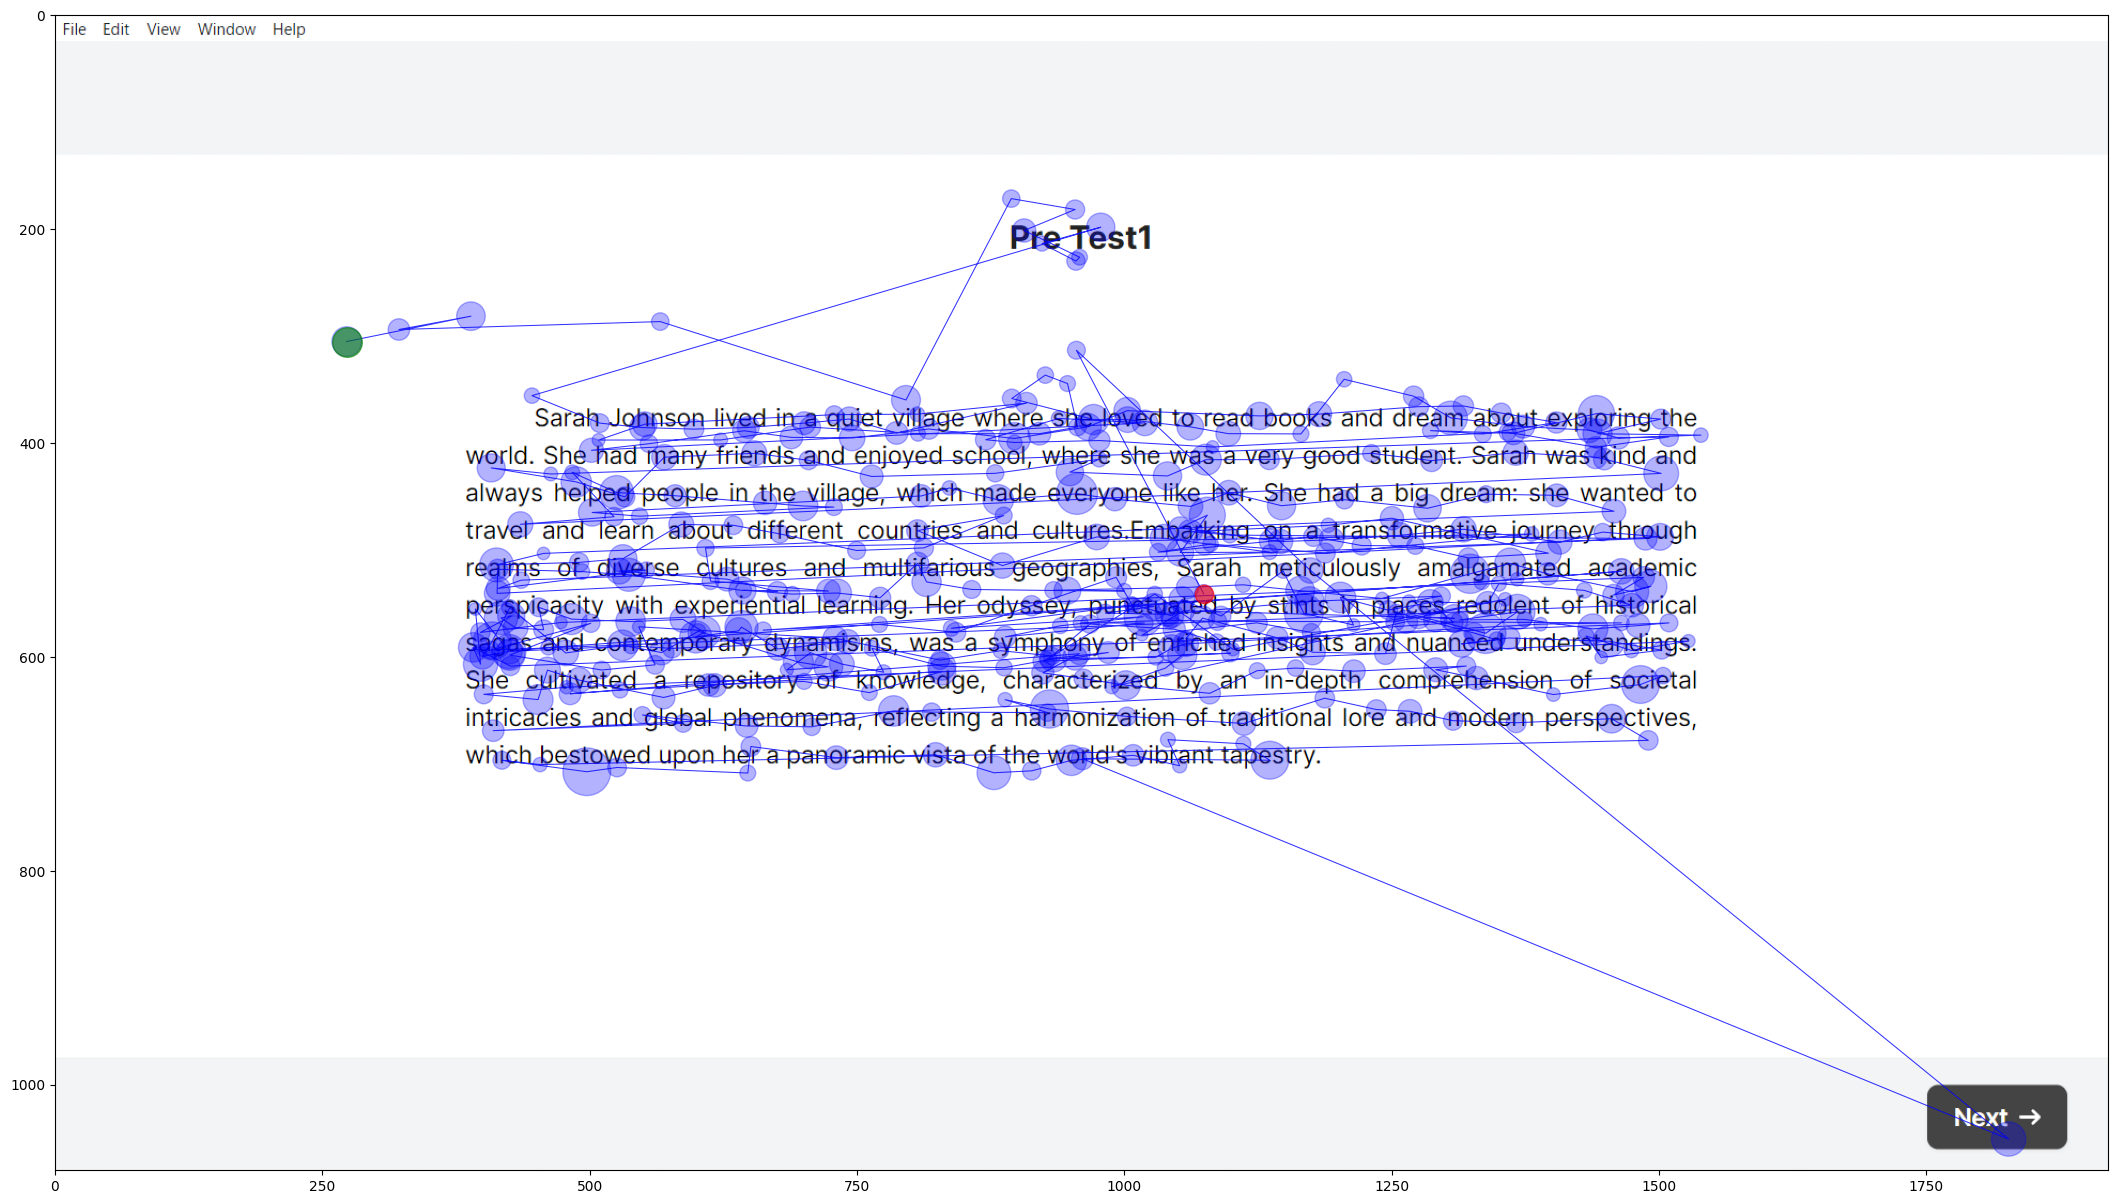

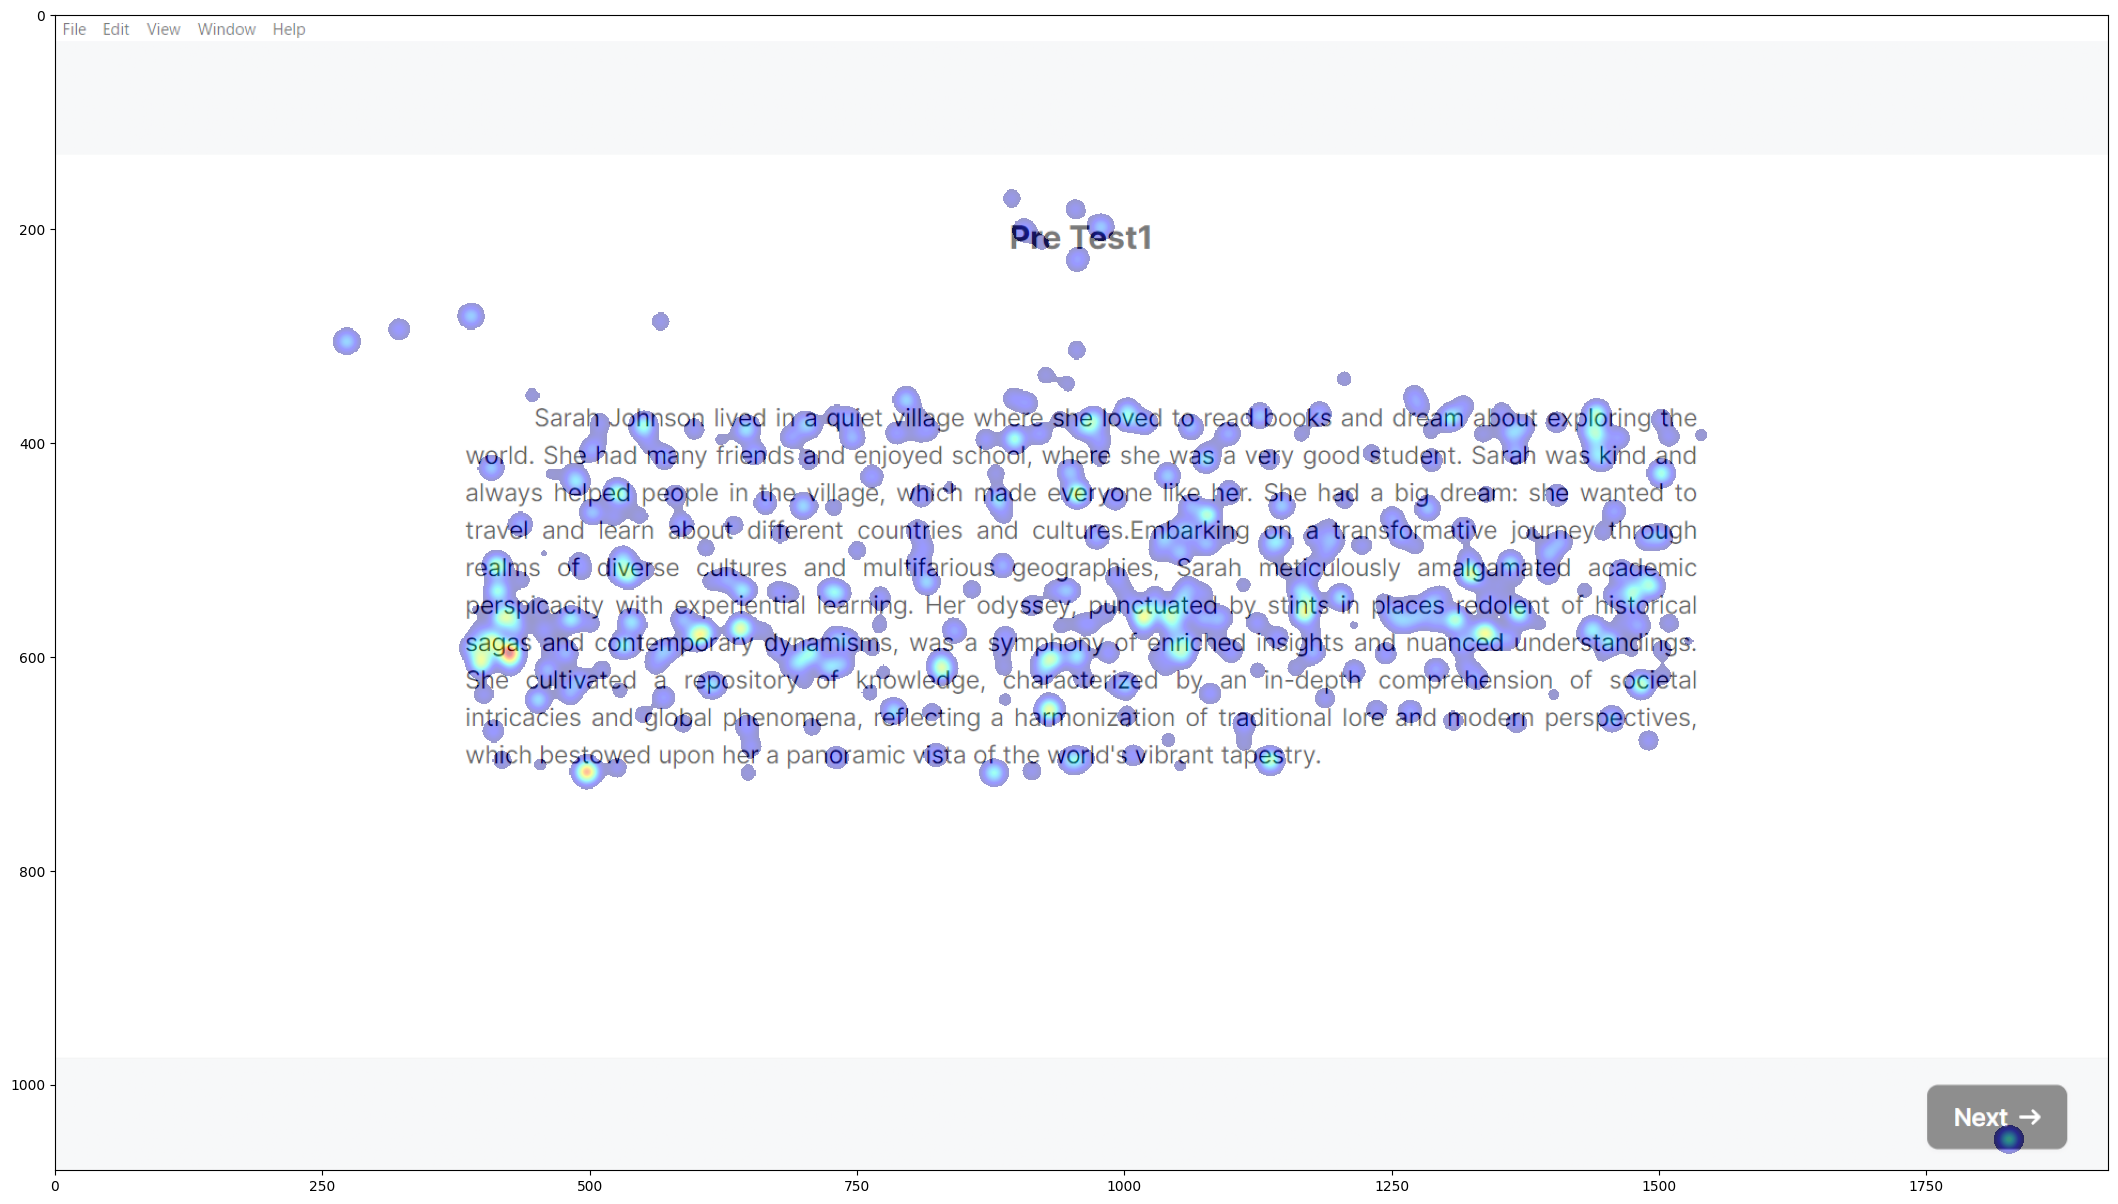

In [6]:
# data = all_data[0]
image_path = target_dir+"002_back.png"

eg.plotScanPath(data[:, 1], data[:, 2], np.array([50.0 for x in data]), bg_image=image_path)

eg.plotScanPath(fx[:, 1], fx[:, 2], fx[:, 3], bg_image=image_path)

eg.plotHeatmap(fx[:, 1], fx[:, 2], fx[:, 3], bg_image=image_path)

## Export

In [7]:
# for i, data in enumerate(all_data):
bi = str(2).zfill(3)
image_path = target_dir+bi+"_back.png"

od = "../../data/output/gaze_raw/"
if not os.path.exists(od):
    os.makedirs(od)
eg.plotScanPath(data[:, 1], data[:, 2], np.array([50.0 for x in data]),
                bg_image=image_path, save_path=od+bi+".png")

fx = eg.detectFixations(data[:, 0], data[:, 1], data[:, 2],
                min_concat_gaze_count=9, min_fixation_size=20, max_fixation_size=40)

od = "../../data/working/fixation/"
if not os.path.exists(od):
    os.makedirs(od)
np.savetxt(od+bi+".csv", fx, delimiter=',', header='timestamp,x,y,duration')

od = "../../data/output/scan_path/"
if not os.path.exists(od):
    os.makedirs(od)
eg.plotScanPath(fx[:, 1], fx[:, 2], fx[:, 3],
                bg_image=image_path, save_path=od+bi+".png")

od = "../../data/output/heatmap/"
if not os.path.exists(od):
    os.makedirs(od)
eg.plotHeatmap(fx[:, 1], fx[:, 2], fx[:, 3],
                bg_image=image_path, save_path=od+bi+".png")

In [8]:
def plot(target_dir):
    gaze_data = pd.read_csv(target_dir+'002.csv')

    for i in range(0, 1):
        x = gaze_data['# timestamp']
        y = gaze_data['x']

        plt.figure(figsize=(20, 10))
        plt.subplot(2,1,1)
        plt.plot(x, y, linewidth=2, color='blue')
        plt.title('Timestamp and gaze x coordinate', fontsize=20)
        plt.xlabel('Timestamp', fontsize=20)
        plt.ylabel('gaze x coordinate', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.grid(True)

        y = gaze_data['y']
        plt.subplot(2,1,2)
        plt.plot(x, y, linewidth=2, color='blue')
        plt.title('Timestamp and gaze y coordinate', fontsize=20)
        plt.xlabel('Timestamp', fontsize=20)
        plt.ylabel('gaze y coordinate', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        plt.grid(True)

        plt.tight_layout()

    return gaze_data['# timestamp']

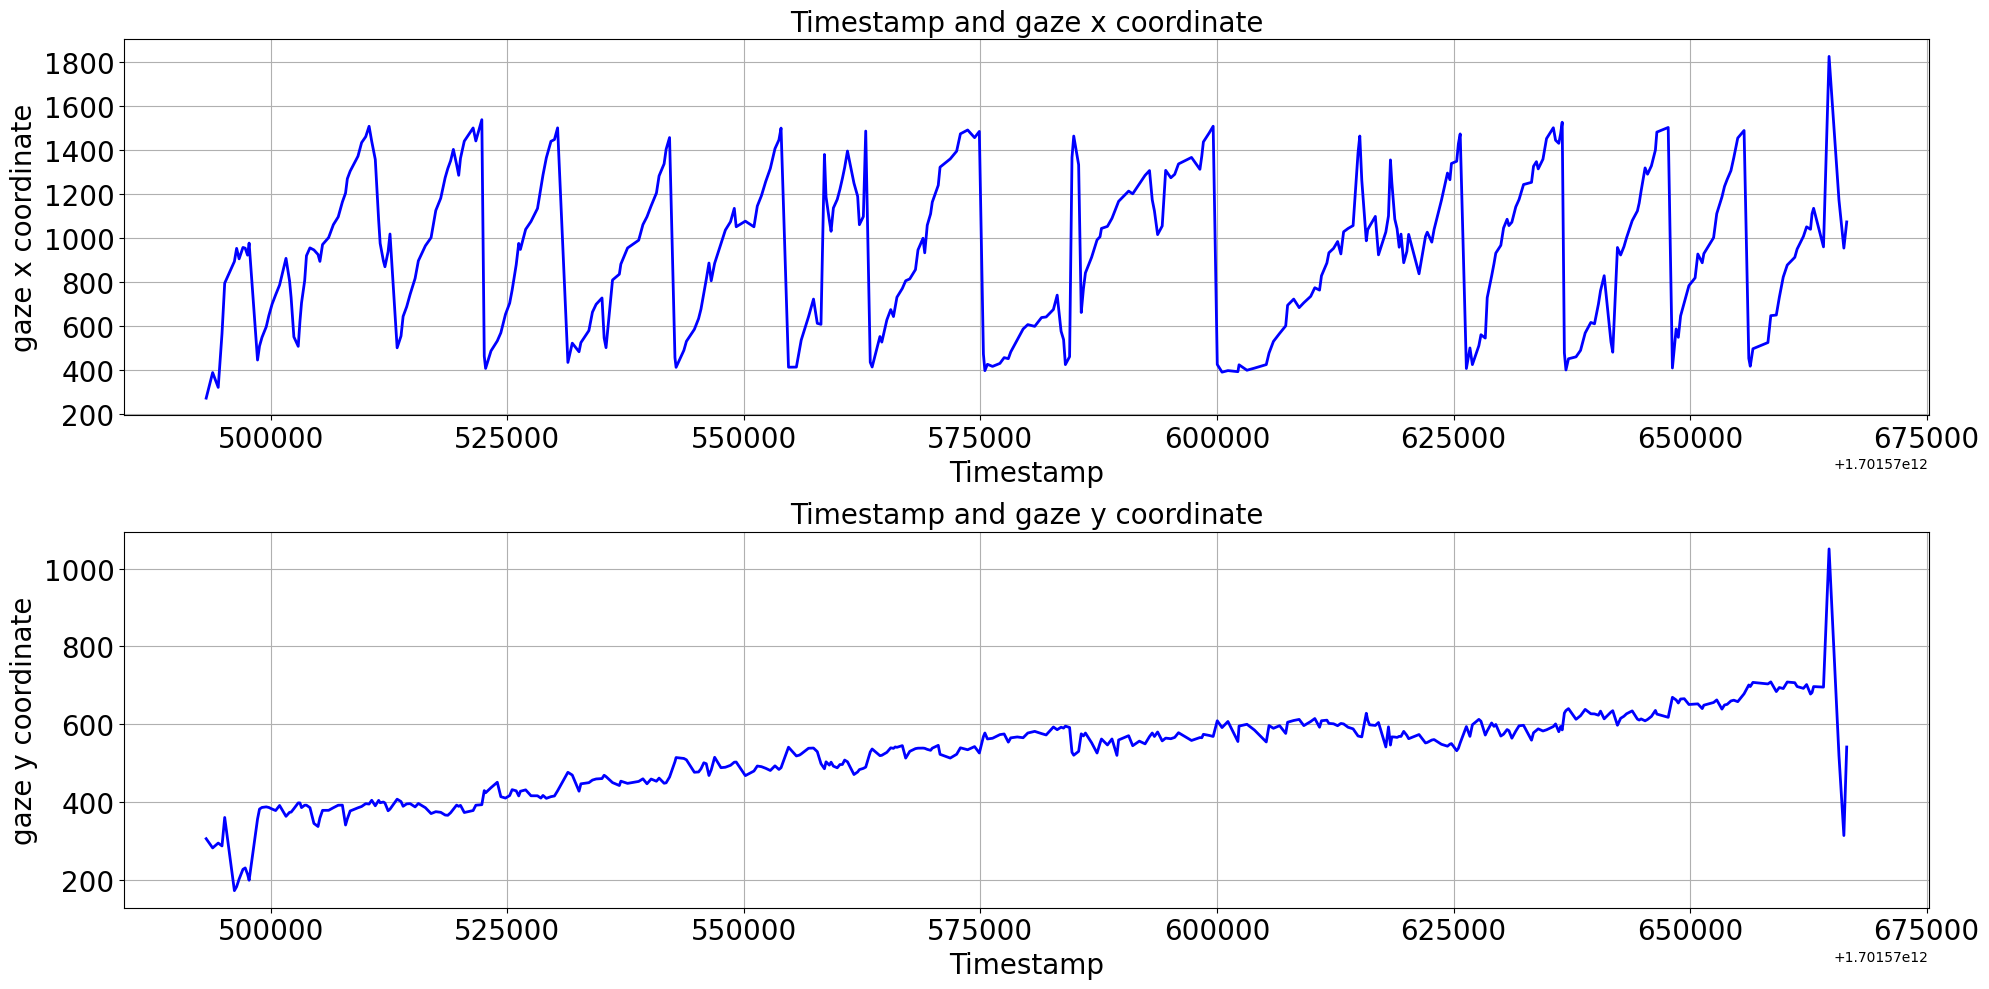

In [9]:
target_dir = "../../data/working/fixation/"
text_data = plot(target_dir)